In [20]:
#pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install tensorflow==2.2.0
!pip install keras==2.3.1

  Using cached tensorflow-2.2.0-cp38-cp38-win_amd64.whl (459.2 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [1]:
from __future__ import division, print_function
import collections
import itertools
import nltk
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [2]:
def get_data(infile):
    stories, questions, answers = [], [], []
    story_text = []
    fin = open(Train_File, "rb") 
    for line in fin:
        line = line.decode("utf-8").strip()
        lno, text = line.split(" ", 1)
        if "\t" in text:
            question, answer, _ = text.split("\t")
            stories.append(story_text)
            questions.append(question)
            answers.append(answer)
            story_text = []
        else:
            story_text.append(text)
    fin.close()
    return stories, questions, answers

In [3]:
file_location = "./"

Train_File = os.path.join(file_location, "qa1_single-supporting-fact_train.txt")
Test_File = os.path.join(file_location, "qa1_single-supporting-fact_test.txt")


# 데이터 가져오기
data_train = get_data(Train_File)
data_test = get_data(Test_File)

print("\n\nTrain observations:",len(data_train[0]),"Test observations:", len(data_test[0]),"\n\n")



Train observations: 10000 Test observations: 10000 




In [4]:
data_test[0]

[['Mary moved to the bathroom.', 'John went to the hallway.'],
 ['Daniel went back to the hallway.', 'Sandra moved to the garden.'],
 ['John moved to the office.', 'Sandra journeyed to the bathroom.'],
 ['Mary moved to the hallway.', 'Daniel travelled to the office.'],
 ['John went back to the garden.', 'John moved to the bedroom.'],
 ['Sandra travelled to the office.', 'Sandra went to the bathroom.'],
 ['Mary went to the bedroom.', 'Daniel moved to the hallway.'],
 ['John went to the garden.', 'John travelled to the office.'],
 ['Daniel journeyed to the bedroom.', 'Daniel travelled to the hallway.'],
 ['John went to the bedroom.', 'John travelled to the office.'],
 ['Mary went to the bedroom.', 'John journeyed to the bathroom.'],
 ['Sandra journeyed to the hallway.', 'John journeyed to the garden.'],
 ['John journeyed to the bathroom.', 'Sandra journeyed to the garden.'],
 ['Sandra went back to the bedroom.', 'Daniel travelled to the bathroom.'],
 ['John went to the office.', 'Mary mo

In [5]:
data_test[1]

['Where is Mary? ',
 'Where is Daniel? ',
 'Where is Daniel? ',
 'Where is Daniel? ',
 'Where is Sandra? ',
 'Where is Sandra? ',
 'Where is Sandra? ',
 'Where is Sandra? ',
 'Where is John? ',
 'Where is Daniel? ',
 'Where is John? ',
 'Where is Mary? ',
 'Where is John? ',
 'Where is John? ',
 'Where is Sandra? ',
 'Where is Daniel? ',
 'Where is Sandra? ',
 'Where is Sandra? ',
 'Where is Sandra? ',
 'Where is Daniel? ',
 'Where is John? ',
 'Where is Mary? ',
 'Where is John? ',
 'Where is Sandra? ',
 'Where is John? ',
 'Where is Daniel? ',
 'Where is John? ',
 'Where is Daniel? ',
 'Where is John? ',
 'Where is Daniel? ',
 'Where is Mary? ',
 'Where is Sandra? ',
 'Where is Daniel? ',
 'Where is John? ',
 'Where is Daniel? ',
 'Where is Mary? ',
 'Where is John? ',
 'Where is Daniel? ',
 'Where is John? ',
 'Where is Sandra? ',
 'Where is Daniel? ',
 'Where is Daniel? ',
 'Where is Daniel? ',
 'Where is Sandra? ',
 'Where is Daniel? ',
 'Where is Sandra? ',
 'Where is Sandra? ',


In [6]:
data_test[2]

['bathroom',
 'hallway',
 'hallway',
 'office',
 'bathroom',
 'bathroom',
 'bathroom',
 'bathroom',
 'office',
 'hallway',
 'bathroom',
 'bedroom',
 'bathroom',
 'bathroom',
 'bedroom',
 'bedroom',
 'kitchen',
 'hallway',
 'hallway',
 'hallway',
 'bathroom',
 'garden',
 'kitchen',
 'hallway',
 'office',
 'bathroom',
 'bedroom',
 'garden',
 'hallway',
 'garden',
 'hallway',
 'kitchen',
 'bathroom',
 'kitchen',
 'garden',
 'kitchen',
 'bedroom',
 'bedroom',
 'kitchen',
 'kitchen',
 'office',
 'office',
 'office',
 'kitchen',
 'hallway',
 'bedroom',
 'bedroom',
 'kitchen',
 'bathroom',
 'kitchen',
 'garden',
 'office',
 'office',
 'office',
 'office',
 'office',
 'hallway',
 'hallway',
 'office',
 'hallway',
 'hallway',
 'bathroom',
 'bedroom',
 'bedroom',
 'kitchen',
 'kitchen',
 'bathroom',
 'garden',
 'kitchen',
 'bathroom',
 'garden',
 'office',
 'bathroom',
 'hallway',
 'office',
 'garden',
 'hallway',
 'kitchen',
 'bedroom',
 'bedroom',
 'office',
 'bathroom',
 'hallway',
 'bathroom

In [7]:
# 학습 및 테스트 데이터에서 Vocab 딕셔너리 구축
dictnry = collections.Counter()
for stories,questions,answers in [data_train,data_test]:
    for story in stories:
        for sent in story:
            for word in nltk.word_tokenize(sent):
                dictnry[word.lower()] +=1
    for question in questions:
        for word in nltk.word_tokenize(question):
            dictnry[word.lower()]+=1
    for answer in answers:
        for word in nltk.word_tokenize(answer):
            dictnry[word.lower()]+=1

word2indx = {w:(i+1) for i,(w,_) in enumerate(dictnry.most_common())}

word2indx["PAD"] = 0
indx2word = {v:k for k,v in word2indx.items()}

vocab_size = len(word2indx)
print("vocabulary size:",len(word2indx))

vocabulary size: 22


In [8]:
# 각 엔티티의 최대 시퀀스 길이 계산
story_maxlen = 0
question_maxlen = 0

for stories, questions, answers in [data_train,data_test]:
    for story in stories:
        story_len = 0
        for sent in story:
            swords = nltk.word_tokenize(sent)
            story_len += len(swords)
        if story_len > story_maxlen:
            story_maxlen = story_len
            
    for question in questions:
        question_len = len(nltk.word_tokenize(question))
        if question_len > question_maxlen:
            question_maxlen = question_len
            
print ("Story maximum length:",story_maxlen,"Question maximum length:",question_maxlen)

Story maximum length: 14 Question maximum length: 4


In [9]:
from keras.layers import Input
from keras.layers.core import Activation, Dense, Dropout, Permute
from keras.layers.embeddings import Embedding
from keras.layers.merge import add, concatenate, dot
from keras.layers.recurrent import LSTM
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
# 데이터를 벡터화된 형태로 변환
def data_vectorization(data, word2indx, story_maxlen, question_maxlen):
    Xs, Xq, Y = [], [], []
    stories, questions, answers = data
    for story, question, answer in zip(stories, questions, answers):
        xs = [[word2indx[w.lower()] for w in nltk.word_tokenize(s)] 
                                   for s in story]
        xs = list(itertools.chain.from_iterable(xs))
        xq = [word2indx[w.lower()] for w in nltk.word_tokenize(question)]
        Xs.append(xs)
        Xq.append(xq)
        Y.append(word2indx[answer.lower()])
    return pad_sequences(Xs, maxlen=story_maxlen), pad_sequences(Xq, maxlen=question_maxlen),\
           np_utils.to_categorical(Y, num_classes=len(word2indx))

In [11]:
Xstrain, Xqtrain, Ytrain = data_vectorization(data_train, word2indx, story_maxlen, question_maxlen)
Xstest, Xqtest, Ytest = data_vectorization(data_test, word2indx, story_maxlen, question_maxlen)

print("Train story",Xstrain.shape,"Train question", Xqtrain.shape,"Train answer", Ytrain.shape)
print( "Test story",Xstest.shape, "Test question",Xqtest.shape, "Test answer",Ytest.shape)


Train story (10000, 14) Train question (10000, 4) Train answer (10000, 22)
Test story (10000, 14) Test question (10000, 4) Test answer (10000, 22)


In [12]:
EMBEDDING_SIZE = 128
LATENT_SIZE = 64
BATCH_SIZE = 64
NUM_EPOCHS = 40

In [13]:
# 입력
story_input = Input(shape=(story_maxlen,))
question_input = Input(shape=(question_maxlen,))

# 스토리 인코더 임베딩
story_encoder = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_SIZE,
                         input_length=story_maxlen)(story_input)
story_encoder = Dropout(0.2)(story_encoder)

# 질문 인코더 임베딩
question_encoder = Embedding(input_dim=vocab_size,output_dim=EMBEDDING_SIZE,
                            input_length=question_maxlen)(question_input)
question_encoder = Dropout(0.3)(question_encoder)

# 스토리와 질문의 일치
match = dot([story_encoder, question_encoder], axes=[2, 2])

# 이야기를 질문의 벡터 공간으로 인코딩
story_encoder_c = Embedding(input_dim=vocab_size,output_dim=question_maxlen,
                           input_length=story_maxlen)(story_input)
story_encoder_c = Dropout(0.3)(story_encoder_c)


# 일치한 내용과 스토리 벡터 결합
response = add([match, story_encoder_c])
response = Permute((2, 1))(response)

# 응답과 질문 벡터를 답변 공간에 결합
answer = concatenate([response, question_encoder], axis=-1)
answer = LSTM(LATENT_SIZE)(answer)
answer = Dropout(0.2)(answer)
answer = Dense(vocab_size)(answer)
output = Activation("softmax")(answer)

model = Model(inputs=[story_input, question_input], outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 14)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 14, 128)      2816        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 4, 128)       2816        input_2[0][0]                    
____________________________________________________________________________________________

In [15]:
# 모델 학습
history = model.fit([Xstrain, Xqtrain], [Ytrain], batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=([Xstest, Xqtest], [Ytest]))

C:\Users\ghd92\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 10000 samples, validate on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 3s 253us/step - loss: 1.9906 - accuracy: 0.2017 - val_loss: 1.6554 - val_accuracy: 0.2877
Epoch 2/40
10000/10000 [==============================] - 2s 167us/step - loss: 1.6377 - accuracy: 0.3349 - val_loss: 1.5328 - val_accuracy: 0.4471
Epoch 3/40
10000/10000 [==============================] - 2s 197us/step - loss: 1.5089 - accuracy: 0.4286 - val_loss: 1.3941 - val_accuracy: 0.5114
Epoch 4/40
10000/10000 [==============================] - 2s 201us/step - loss: 1.3904 - accuracy: 0.4979 - val_loss: 1.2898 - val_accuracy: 0.5315
Epoch 5/40
10000/10000 [==============================] - 2s 202us/step - loss: 1.3141 - accuracy: 0.5183 - val_loss: 1.2510 - val_accuracy: 0.5423
Epoch 6/40
10000/10000 [==============================] - 2s 198us/step - loss: 1.2809 - accuracy: 0.5174 - val_loss: 1.2235 - val_accuracy: 0.5424
Epoch 7/40
10000/10000 [==============================] - 2s 1

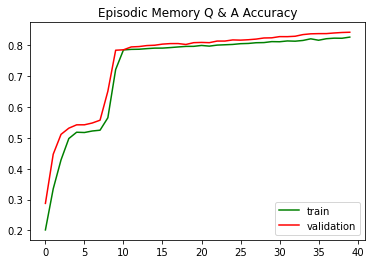

In [16]:
# 정확도와 손실도 플롯
plt.title("Episodic Memory Q & A Accuracy")
plt.plot(history.history["accuracy"], color="g", label="train")
plt.plot(history.history["val_accuracy"], color="r", label="validation")
plt.legend(loc="best")
plt.show()

In [17]:
# 레이블 예측 가져오기
ytest = np.argmax(Ytest, axis=1)
Ytest_ = model.predict([Xstest, Xqtest])
ytest_ = np.argmax(Ytest_, axis=1)

In [18]:
# 무작위로 질문을 선택하고 답변을 예측
NUM_DISPLAY = 10
   
for i in random.sample(range(Xstest.shape[0]),NUM_DISPLAY):
    story = " ".join([indx2word[x] for x in Xstest[i].tolist() if x != 0])
    question = " ".join([indx2word[x] for x in Xqtest[i].tolist()])
    label = indx2word[ytest[i]]
    prediction = indx2word[ytest_[i]]
    print(story, question, label, prediction)

mary journeyed to the bedroom . daniel travelled to the office . where is daniel ? office office
daniel went to the office . sandra travelled to the bathroom . where is sandra ? bathroom bathroom
sandra went to the office . mary went to the bedroom . where is mary ? bedroom bedroom
john went back to the bathroom . mary went back to the kitchen . where is mary ? kitchen kitchen
john travelled to the bedroom . sandra went to the bedroom . where is sandra ? bedroom bedroom
sandra went to the office . john journeyed to the bathroom . where is john ? bathroom bathroom
daniel moved to the office . john went to the hallway . where is daniel ? office office
daniel went back to the hallway . mary went back to the garden . where is mary ? garden garden
john went to the kitchen . john journeyed to the office . where is john ? office office
daniel travelled to the bedroom . daniel journeyed to the hallway . where is daniel ? hallway hallway
